# Emissions by Country 2022 Analysis

## import libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [121]:
df = pd.read_csv("https://raw.githubusercontent.com/fatemearyaie/Emissions-by-Country/main/GCB2022v27_MtCO2_flat.csv")

In [86]:
df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
df.tail()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423
63103,Global,WLD,2021,37123.850352,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746,4.693699


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63104 entries, 0 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             63104 non-null  object 
 1   ISO 3166-1 alpha-3  61472 non-null  object 
 2   Year                63104 non-null  int64  
 3   Total               62904 non-null  float64
 4   Coal                21744 non-null  float64
 5   Oil                 21717 non-null  float64
 6   Gas                 21618 non-null  float64
 7   Cement              20814 non-null  float64
 8   Flaring             21550 non-null  float64
 9   Other               1620 non-null   float64
 10  Per Capita          18974 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.3+ MB


In [89]:
df.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,63104.000000,62904.000000,21744.000000,21717.000000,21618.000000,20814.000000,21550.000000,1620.000000,18974.000000
mean,1885.500000,55.224788,73.968916,55.760624,23.504285,4.330443,1.712695,10.951389,4.413363
std,78.519728,824.845435,598.986992,519.034563,247.674772,50.305770,16.727067,39.034073,17.432815
min,1750.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1817.750000,0.000000,0.000000,0.091600,0.000000,0.000000,0.000000,0.520885,0.197866
50%,1885.500000,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303949
75%,1953.250000,0.549342,6.736411,8.339752,0.581628,0.568502,0.000000,4.385471,5.077994
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,306.638573,834.192642


In [90]:
df.isna().sum()

Country                   0
ISO 3166-1 alpha-3     1632
Year                      0
Total                   200
Coal                  41360
Oil                   41387
Gas                   41486
Cement                42290
Flaring               41554
Other                 61484
Per Capita            44130
dtype: int64

In [91]:
df.shape

(63104, 11)

In [92]:
df = df.pivot_table(index=['Country', 'ISO 3166-1 alpha-3'], aggfunc='mean').reset_index()

In [93]:
df.isna().sum()

Country                 0
ISO 3166-1 alpha-3      0
Cement                  1
Coal                    1
Flaring                 1
Gas                     1
Oil                     0
Other                 179
Per Capita              1
Total                   0
Year                    0
dtype: int64

In [94]:
df['Other'] = df['Other'].fillna(df['Other'].mean())

In [95]:
df.isna().sum()

Country               0
ISO 3166-1 alpha-3    0
Cement                1
Coal                  1
Flaring               1
Gas                   1
Oil                   0
Other                 0
Per Capita            1
Total                 0
Year                  0
dtype: int64

In [96]:
df.dropna(axis=0, inplace=True)

In [97]:
df.drop(['Year', 'Per Capita'], axis=1, inplace=True)

In [98]:
df.isna().isna().sum()

Country               0
ISO 3166-1 alpha-3    0
Cement                0
Coal                  0
Flaring               0
Gas                   0
Oil                   0
Other                 0
Total                 0
dtype: int64

In [99]:
corr = df.corr()

<AxesSubplot:>

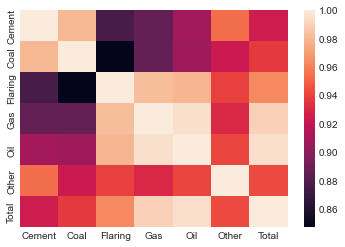

In [100]:
sns.heatmap(corr)

In [101]:
df[['Country', 'Total']].sort_values(by=['Total'], ascending=False).head(10)

,Country,Total
77,Global,6385.772167
212,USA,1551.128144
41,China,916.738300
166,Russia,432.160410
75,Germany,342.979793
216,United Kingdom,288.635000
100,Japan,245.261336
91,India,209.946281
69,France,143.771195
36,Canada,125.424248


In [102]:
df.sort_values(by=['Total'], ascending=False, inplace=True)

<BarContainer object of 9 artists>

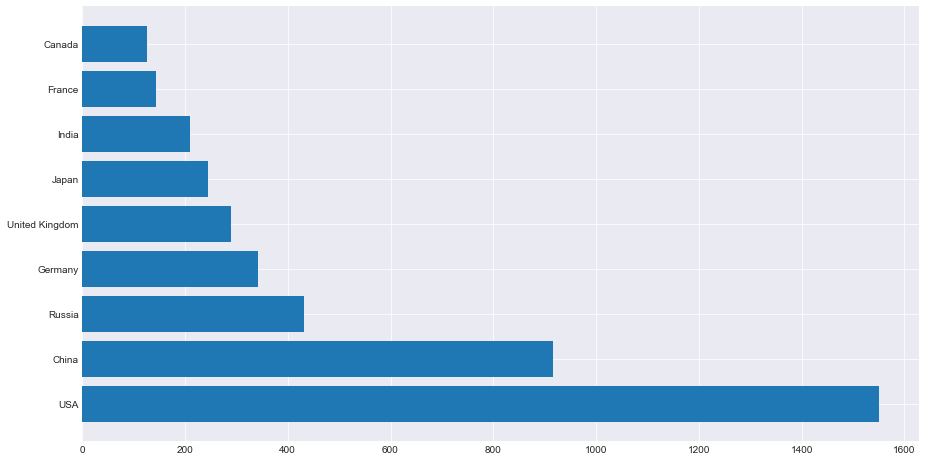

In [103]:
ybar = df['Total'].head(10)[1:]
xbar = df['Country'].head(10)[1:]
plt.figure(figsize=(15,8))
plt.barh(xbar, ybar)

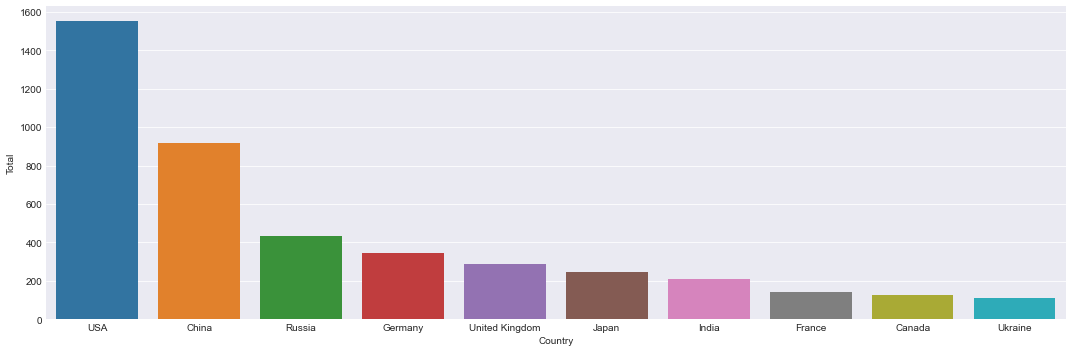

In [105]:
sns.catplot(x="Country", y="Total", kind="bar", data=df.head(11)[1:],height=5, aspect=27/9)

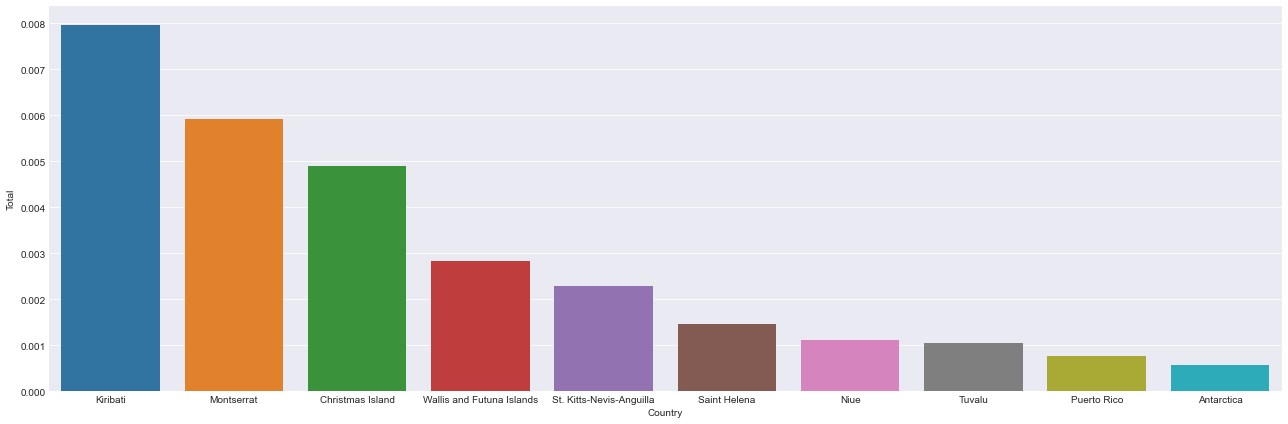

In [106]:
sns.catplot(x="Country", y="Total", kind="bar", data=df.tail(11)[1:],height=6, aspect=27/9)

<AxesSubplot:ylabel='Total'>

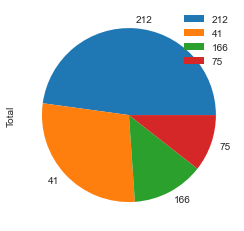

In [113]:
df.head()[1:].plot(kind='pie', y='Total')

In [120]:
df

,Country,ISO 3166-1 alpha-3,Cement,Coal,Flaring,Gas,Oil,Other,Total
77,Global,WLD,317.372713,2956.581079,256.309522,1814.698722,3625.609201,251.782569,6385.772167
212,USA,USA,19.688948,790.292747,10.906544,353.795241,726.464086,12.095011,1551.128144
41,China,CHN,166.572469,1626.725321,0.566013,59.190177,285.054076,79.025024,916.738300
166,Russia,RUS,18.232680,268.067489,8.743808,206.201261,195.410694,17.390770,432.160410
75,Germany,DEU,12.836241,281.155839,0.406843,31.205468,86.316148,9.203392,342.979793
...,...,...,...,...,...,...,...,...,...
169,Saint Helena,SHN,0.000000,0.000000,0.000000,0.000000,0.009524,9.528143,0.001471
147,Niue,NIU,0.000000,0.000000,0.000000,0.000000,0.005807,9.528143,0.001110
211,Tuvalu,TUV,0.000000,0.000000,0.000000,0.000000,0.008963,9.528143,0.001054
163,Puerto Rico,PRI,0.000000,0.000000,0.000000,0.000000,0.208848,9.528143,0.000768
